Fitting 3 folds for each of 72 candidates, totalling 216 fits

✅ Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
✅ Training MSE: 0.3990
✅ Training R²: 0.9155
✅ Test MSE: 0.5253
✅ Test R²: 0.8813


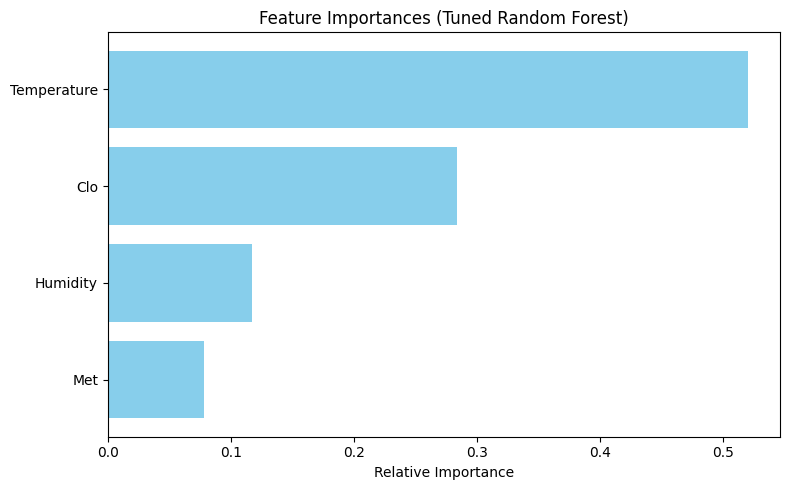

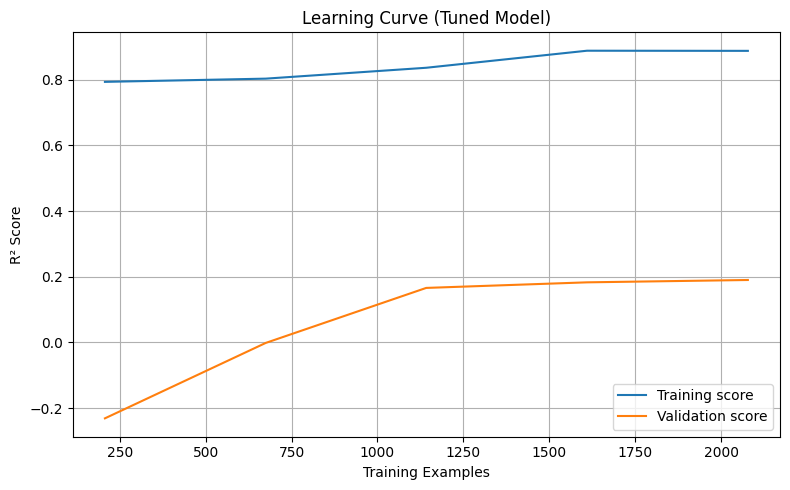

['best_random_forest_model.pkl']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load your dataset
df = pd.read_csv(r"E:\4th Year Project\Python\updated-data.csv")
df.columns = df.columns.str.strip()

# 2. Define input features and target
X = df[['Temperature', 'Humidity', 'Met', 'Clo']]
y = df['PMV']

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Adjusted hyperparameter grid to reduce overfitting
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# 5. Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 6. Evaluate on test and train sets
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\n✅ Best Hyperparameters:", grid_search.best_params_)
print(f"✅ Training MSE: {train_mse:.4f}")
print(f"✅ Training R²: {train_r2:.4f}")
print(f"✅ Test MSE: {test_mse:.4f}")
print(f"✅ Test R²: {test_r2:.4f}")

# 7. Plot feature importances
importances = best_model.feature_importances_
features = ['Temperature', 'Humidity', 'Met', 'Clo']
indices = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Tuned Random Forest)")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

# 8. Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Validation score")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.title("Learning Curve (Tuned Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import joblib

# Save the best Random Forest model to a file
joblib.dump(best_model, "best_random_forest_model.pkl")


